In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
import math
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv("kidney_disease.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
data.rename(columns={"sg":"Specifi_gravity","al":"Albumin","rbc":"RBC","pc":"Pus_cell","pcc":"Pus_cell_clumps",
                       "ba":"Bacteria","bgr":"Blood_glucose_random","bu":"Blood_urea","sc":"Serum_creatine",
                        "sod":"Sodium","pot":"Potassium","hemo":"Hemoglobin","pcv":"Packed_cell_volume","wc":"White_cell_count",
                        "rc":"Red_cell_count",
                        "htn":"Hypertension",
                        "dm":"Diabetes_mellitus",
                        "cad":"Coronary_artery_disease",
                        "appet":"Appetite",
                        "pe":"Pedal_edema",
                        "ane":"Anemia"
                        },inplace=True)
data.describe()

,id,age,bp,Specifi_gravity,Albumin,su,Blood_glucose_random,Blood_urea,Serum_creatine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
data.dropna(inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       158 non-null    int64  
 1   age                      158 non-null    float64
 2   bp                       158 non-null    float64
 3   Specifi_gravity          158 non-null    float64
 4   Albumin                  158 non-null    float64
 5   su                       158 non-null    float64
 6   RBC                      158 non-null    object 
 7   Pus_cell                 158 non-null    object 
 8   Pus_cell_clumps          158 non-null    object 
 9   Bacteria                 158 non-null    object 
 10  Blood_glucose_random     158 non-null    float64
 11  Blood_urea               158 non-null    float64
 12  Serum_creatine           158 non-null    float64
 13  Sodium                   158 non-null    float64
 14  Potassium                1

In [6]:
import plotly.express as px

fig = px.scatter(data, x="Albumin", y="Serum_creatine", color="classification",
                title="Albumin and creatine")
fig.show()

In [20]:
data.groupby(['Albumin','classification'])['Albumin'].count()

Albumin  classification
0.0      ckd                 1
         notckd            115
1.0      ckd                 3
2.0      ckd                 9
3.0      ckd                15
4.0      ckd                15
Name: Albumin, dtype: int64

# observation 
Level 0 above for albumin is symptoms of CKD
A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an early sign that the kidneys are not working properly. As kidney disease progresses, the level of creatinine in the blood rises.


sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20,12)
sns.stripplot(x="age", y="Blood_urea", data=data,jitter=True,hue='classification',palette='Set1',size=10)

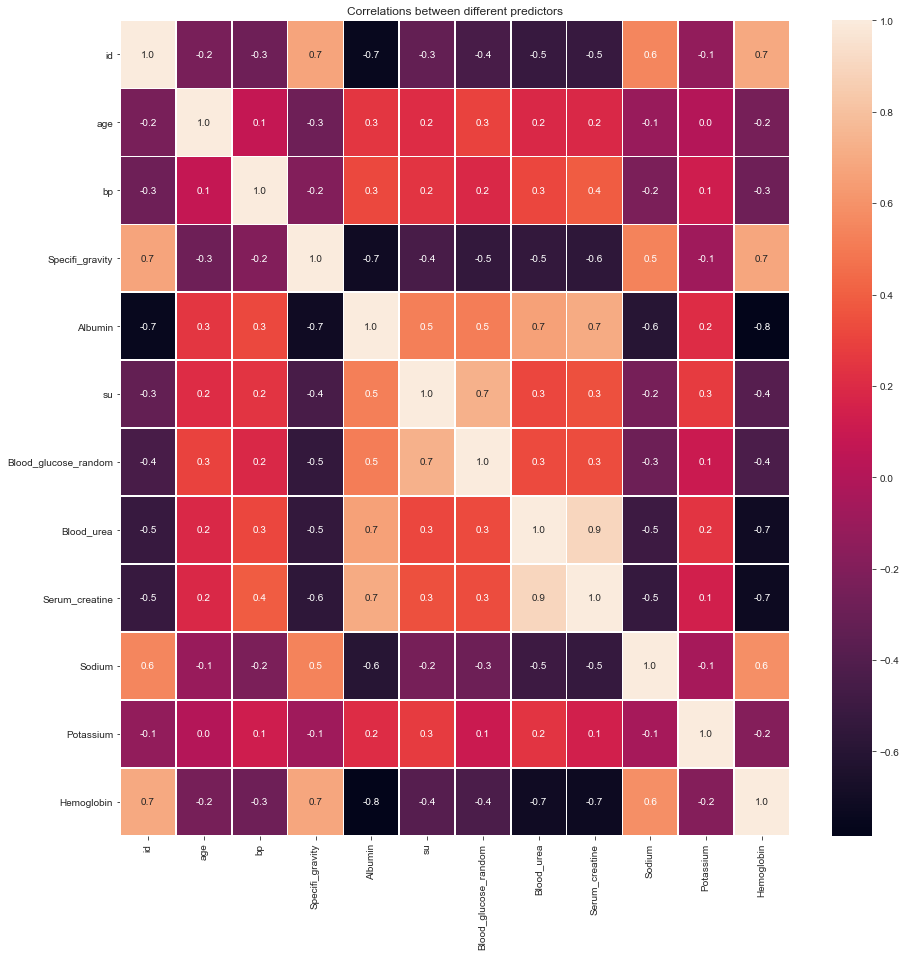

In [8]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

In [9]:
data.groupby(['classification'])['Hemoglobin'].agg(['mean','median'])

,mean,median
classification,,
ckd,9.769767,9.8
notckd,15.152174,15.0


In [10]:
fig = px.scatter(data, x="Red_cell_count", y="Hemoglobin", color="classification")
fig.show() 

# observation
 As red_blood_cell_count increases hemoglobin
 person having RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney disease
person having RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney disease
 there are few cases where even a person having a normal range of RBC count and hemoglobin still he or she has chronic kidney disease because of other factors will check this later

In [11]:
def violin(col): 
    fig = px.violin(data, y=col, x="classification", color="classification", box=True, points="all", hover_data=data.columns)
    return fig.show()
def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="classification", aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

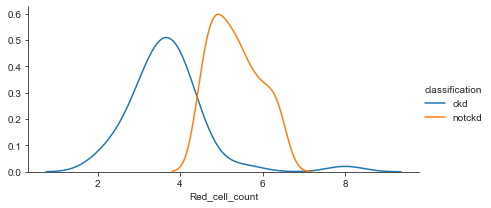

In [13]:
data['Red_cell_count'] = pd.to_numeric(data['Red_cell_count'], errors='coerce')
kde_plot('Red_cell_count')

In [16]:
data.groupby(['classification'])['Red_cell_count'].agg(['mean','median'])

,mean,median
classification,,
ckd,3.695349,3.7
notckd,5.339130,5.3


In [17]:
violin('Red_cell_count')

In [18]:
violin('Packed_cell_volume')

In [19]:
violin('Hemoglobin')

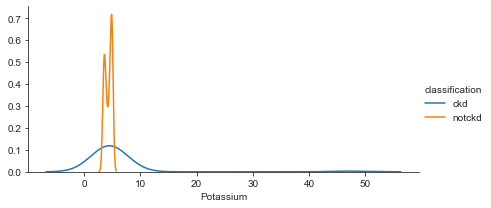

In [23]:
kde_plot('Potassium')

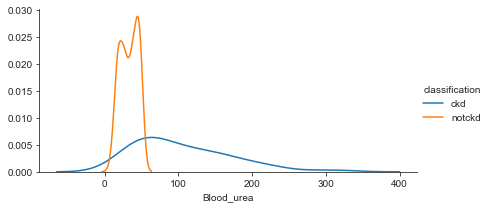

In [24]:
kde_plot('Blood_urea')

<AxesSubplot:xlabel='Potassium', ylabel='Blood_urea'>

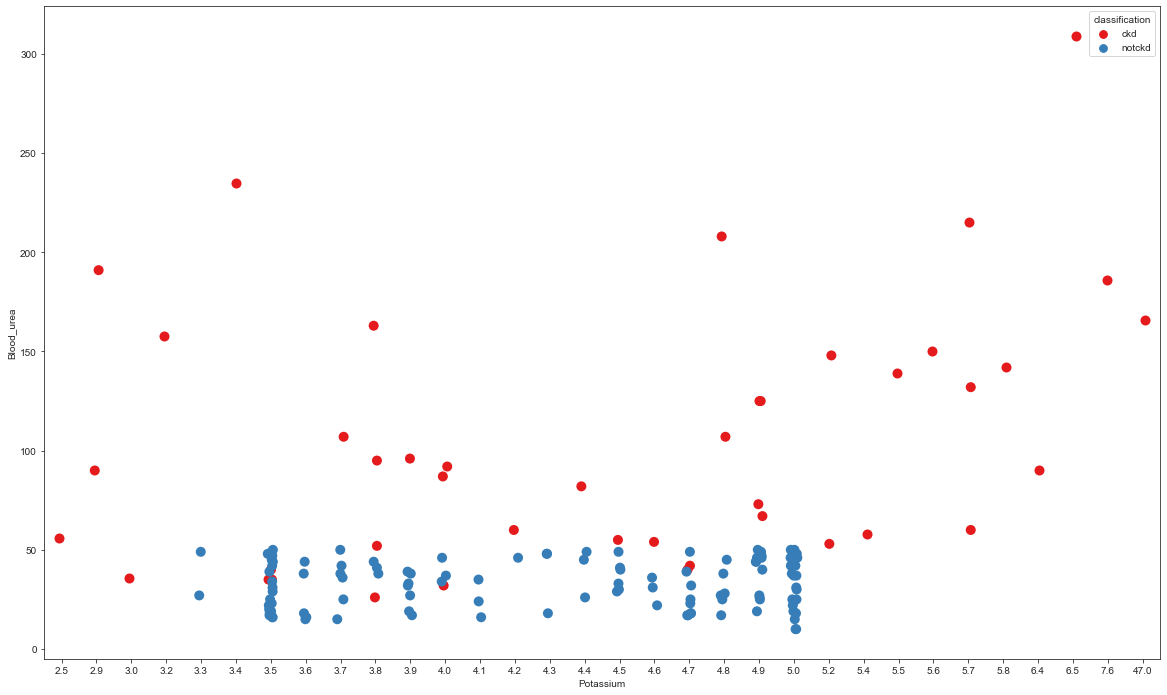

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20,12)
sns.stripplot(x="Potassium", y="Blood_urea", data=data,jitter=True,hue='classification',palette='Set1',size=10)

# Observation
here we have potassium in range 2.7 to 6.5 and blood urea in range 10 to 391 including both CKD and, not-CKD.
We have 2 extreme cases of CKD, they have a high range of potassium and blood urea
people have blood urea in the range 10 to 50 are majorly classified as a not-CKD, blood urea more than 50 are classified as CKD patient
there are few cases where a person having potassium and blood urea within range still they are suffering from CKD

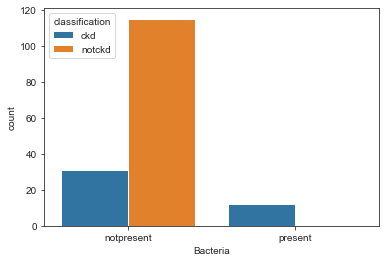

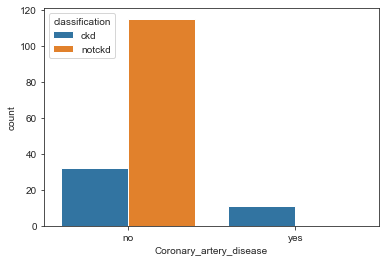

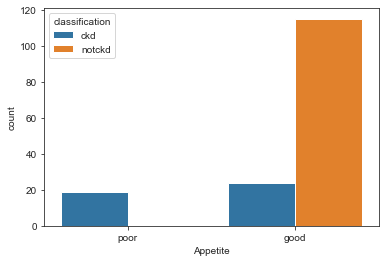

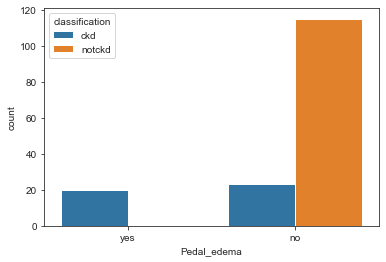

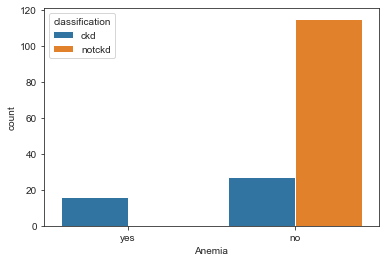

In [46]:
col = ['Bacteria','Coronary_artery_disease', 'Appetite', 'Pedal_edema','Anemia']
for i in col:
    sns.countplot(i, hue = 'classification', data = data)
    plt.show()